In [14]:
import multiprocessing
import tqdm

import numpy as np
import scipy.stats as st
import numba
import random
import matplotlib.pyplot as plt
import scipy.integrate

# Plotting modules
import bokeh.io
import bokeh.plotting

bokeh.io.output_notebook()

# for pretty plots
import seaborn as sns
sns.set(font_scale = 1.5, rc={"lines.linewidth":2})


Loading BokehJS ...

In [95]:
beta = 100 # per min
gamma = 1 # per min, per transcript

m = [1]
t = [0]

total_time = 10 # mins

c = 0

while t[-1] < total_time:
    
    c += 1
    
    production_rate = beta
    degradation_rate = m[-1]*gamma
    total_rate = production_rate + degradation_rate
    
    production_propensity = production_rate / total_rate
    degradation_propensity = degradation_rate / total_rate
    
    update = random.choices(["production", "degradation"], weights=(production_propensity, degradation_propensity))[0]
    
    if update == "production":
        m.append(m[-1]+1)
        time_elapsed = np.random.exponential(1/production_rate)
        t.append(t[-1] + time_elapsed)
        
    if update == "degradation":
        m.append(m[-1]-1)
        time_elapsed = np.random.exponential(1/degradation_rate)
        t.append(t[-1] + time_elapsed)

print(c)

932


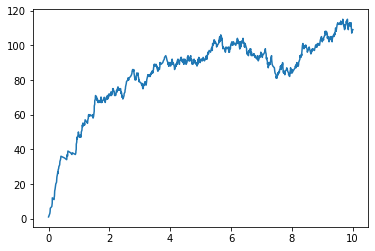

In [96]:
plt.plot(t,m)

In [113]:
beta = 100 # per min
gamma = 1 # per min, per transcript

m = [1]
t = [0]

total_time = 10 # mins

c = 0

while t[-1] < total_time:
    
    c += 1
    
    production_rate = beta
    degradation_rate = m[-1]*gamma
    total_rate = production_rate + degradation_rate
    
    time_elapsed = np.random.exponential(1/total_rate)
    t.append(t[-1] + time_elapsed)
    
    update = random.choices(["production", "degradation"], weights=(production_rate, degradation_rate))[0]
    
    if update == "production":
        m.append(m[-1]+1)
        
    if update == "degradation":
        m.append(m[-1]-1)

print(c)

1921


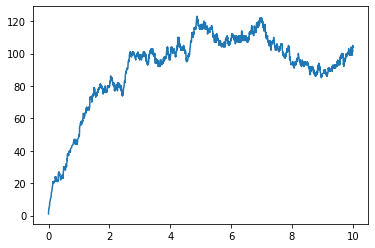

In [114]:
plt.plot(t, m)

In [108]:
def rhs(xy, t, beta, gamma):
    """
    Right hand side for logistic growth.
    Looking at two population silumtaneously 
    """
    x, y = xy
    
    # Compute dx/dt
    dx_dt =  beta - gamma*x
    
    dy_dt = 0

    # Return the result as a NumPy array
    return np.array([dx_dt, dy_dt])

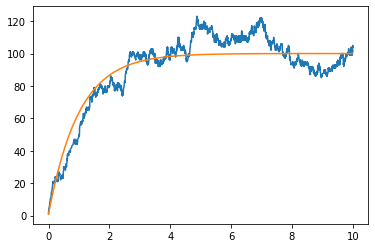

In [115]:
plt.plot(t, m)
plt.plot(t2, x2[:,0])

In [116]:
x2

array([[ 1.        ,  0.        ],
       [ 1.98604761,  0.        ],
       [ 2.96227409,  0.        ],
       ...,
       [99.99541456,  0.        ],
       [99.99546023,  0.        ],
       [99.99550544,  0.        ]])

In [118]:
def rhs(x, t, beta, gamma):
    """
    Right hand side for logistic growth.
    Looking at two population silumtaneously 
    """
    # Compute dx/dt
    dx_dt =  beta - gamma*x

    # Return the result as a NumPy array
    return np.array(dx_dt)

# Time points we want for the solution
t2 = np.linspace(0,10,1000)

# Initial conditions
x_0 = np.array([1])

# Package parameters into a tuple
args = (beta, gamma)

# Integrate ODES
x2 = scipy.integrate.odeint(rhs, x_0, t2, args=args)

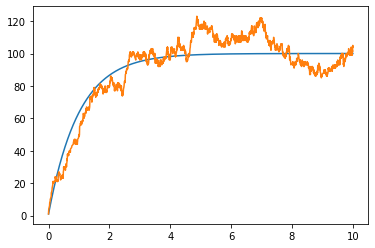

In [122]:
plt.plot(t2,x2)
plt.plot(t,m)

In [ ]:
# specifying the parameters
beta_m = 10 # per min
gamma_m = 1 # per min, per transcript
beta_p = 10 # per min
gamma_p = 0.5 # per min, per protein

# initializing the number of mRNAs and the time
m = [1]
p = [1]
t = [0]

# how long we want run simulation for
total_time = 20 # mins

while t[-1] < total_time:
    
    # specify the propensities for the possible state change
    m_production_rate = beta_m
    m_degradation_rate = m[-1] * gamma_m
    p_production_rate = beta_p * m[-1]
    p_degradation_rate = p[-1] * gamma_p
    
    # add up all the propensities
    total_rate = m_production_rate + m_degradation_rate + p_production_rate + p_degradation_rate
    
    # determine how much time elapses before "something+ happens
    time_elapsed = np.random.exponential(1/total_rate)
    
    # update time array 
    t.append(t[-1] + time_elapsed)
    
    # randomly choose which event happens
    event = random.choices(["m production", "m degradation", "p production", "p degradation", 
                           ], weights=(m_production_rate, m_degradation_rate,
                                       p_production_rate, p_degradation_rate,))[0]
    
    # update mRNA list based on which event happend
    if event == "m production":
        m.append(m[-1]+1)
        p.append(p[-1])
        
    if event == "m degradation":
        m.append(m[-1]-1)
        p.append(p[-1])
        
    if event == "p production":
        p.append(p[-1]+1)
        m.append(m[-1])
        
    if event == "p degradation":
        p.append(p[-1]-1)
        m.append(m[-1])


\begin{aligned}
&\dot{a}=\frac{\beta_a}{\left(\frac{k_b}{b}\right)^n+1}-\gamma_a a \\
&\dot{b}=\frac{\beta_b}{\left(\frac{k_a}{a}\right)^n+1}-\gamma_b b
\end{aligned}


/Users/sbeeler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/sbeeler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


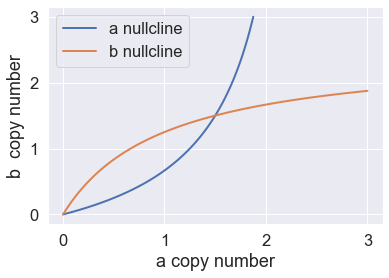

In [15]:
# parameters
gamma_x = gamma_y = 4 # per min
beta_x = beta_y = 10 # per min 
k_x = k_y = 1 # copy number
n = 1

# values of A and B to plot over
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)

# define nullclines
null_x = beta_x / ((k_y/y)**n + 1) / gamma_x 
null_y = beta_y / ((k_x/x)**n + 1) / gamma_y 

# plot nullclines and label
plt.plot(null_x, y)
plt.plot(x, null_y)
plt.xlabel('a copy number')
plt.ylabel('b  copy number')
plt.legend(['a nullcline','b nullcline'])



/Users/sbeeler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/sbeeler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


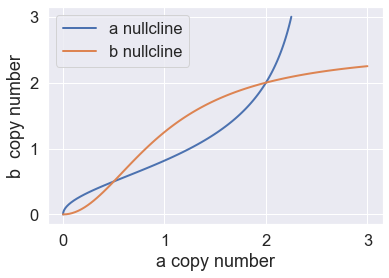

In [16]:
# parameters
gamma_x = gamma_y = 4 # per min
beta_x = beta_y = 10 # per min 
k_x = k_y = 1 # copy number
n = 2

# values of A and B to plot over
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)

# define nullclines
null_x = beta_x / ((k_y/y)**n + 1) / gamma_x 
null_y = beta_y / ((k_x/x)**n + 1) / gamma_y 

# plot nullclines and label
plt.plot(null_x, y)
plt.plot(x, null_y)
plt.xlabel('a copy number')
plt.ylabel('b  copy number')
plt.legend(['a nullcline','b nullcline'])


\begin{align}
\begin{array}{ll}
\text{reaction, }r_i & \text{propensity, } a_i \\
m \rightarrow m+1,\;\;\;\; &  \\[0.3em]
m \rightarrow m-1, \;\;\;\; & \\[0.3em]
p \rightarrow p+1, \;\;\;\; & \\[0.3em]
p \rightarrow p-1, \;\;\;\; & 
\end{array}
\end{align}

$$ \frac{\mathrm{d}m}{\mathrm{d}t} = \beta_m p - \gamma_m m$$

$$ \frac{\mathrm{d}p}{\mathrm{d}t} = \beta_p m - \gamma_p p$$